In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("dataset.csv")

In [19]:
df

,price_sq,panel,brick,LAF,presoc,soc,postsoc,center,mid,suburban,rural,kinder_garden,metro_station,rooms
0,1504.705882,1,0,0,0,1,0,0,0,1,0,1,0,3
1,1830.769231,1,0,0,0,1,0,0,1,0,0,1,0,2
2,2500.000000,0,1,0,0,1,0,1,0,0,0,1,0,2
3,1791.139241,0,1,0,0,0,1,0,0,0,1,1,0,2
4,2281.050228,0,1,0,1,0,0,1,0,0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,1360.101010,0,1,0,0,0,1,0,0,1,0,0,1,2
5516,1455.882353,0,1,0,0,0,1,0,0,1,0,0,1,2
5517,1438.356164,0,1,0,0,0,1,0,0,1,0,0,1,2
5518,1451.171171,0,1,0,0,0,1,0,0,1,0,0,1,3


### Choosing reference categorical variables to avoid multicolinearity

#### Build Material

In [20]:
panel_count = df['panel'].sum()
brick_count = df['brick'].sum()
LAF_count = df['LAF'].sum()

print(f"Panel: {panel_count}")
print(f"Brick: {brick_count}")
print(f"LAF: {LAF_count}")

Panel: 747
Brick: 4480
LAF: 293


#### "brick" is the most common, taking it as a baseline

In [21]:
df2=df.drop(df.columns[2], axis=1)

In [23]:
df2

,price_sq,panel,LAF,presoc,soc,postsoc,center,mid,suburban,rural,kinder_garden,metro_station,rooms
0,1504.705882,1,0,0,1,0,0,0,1,0,1,0,3
1,1830.769231,1,0,0,1,0,0,1,0,0,1,0,2
2,2500.000000,0,0,0,1,0,1,0,0,0,1,0,2
3,1791.139241,0,0,0,0,1,0,0,0,1,1,0,2
4,2281.050228,0,0,1,0,0,1,0,0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,1360.101010,0,0,0,0,1,0,0,1,0,0,1,2
5516,1455.882353,0,0,0,0,1,0,0,1,0,0,1,2
5517,1438.356164,0,0,0,0,1,0,0,1,0,0,1,2
5518,1451.171171,0,0,0,0,1,0,0,1,0,0,1,3


#### Location

In [24]:
center_count = df['center'].sum()
mid_count = df['mid'].sum()
suburban_count = df['suburban'].sum()
rural_count = df['rural'].sum()

print(f"Center: {center_count}")
print(f"Mid-town: {mid_count}")
print(f"Suburban: {suburban_count}")
print(f"Rural: {rural_count}")

Center: 638
Mid-town: 1210
Suburban: 3313
Rural: 359


#### Removing "suburban" as it is the most common

In [27]:
df3=df2.drop(df2.columns[8], axis=1)

In [28]:
df3

,price_sq,panel,LAF,presoc,soc,postsoc,center,mid,rural,kinder_garden,metro_station,rooms
0,1504.705882,1,0,0,1,0,0,0,0,1,0,3
1,1830.769231,1,0,0,1,0,0,1,0,1,0,2
2,2500.000000,0,0,0,1,0,1,0,0,1,0,2
3,1791.139241,0,0,0,0,1,0,0,1,1,0,2
4,2281.050228,0,0,1,0,0,1,0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
5515,1360.101010,0,0,0,0,1,0,0,0,0,1,2
5516,1455.882353,0,0,0,0,1,0,0,0,0,1,2
5517,1438.356164,0,0,0,0,1,0,0,0,0,1,2
5518,1451.171171,0,0,0,0,1,0,0,0,0,1,3


#### build period

In [29]:
postsoc_count = df['postsoc'].sum()
soc_count = df['soc'].sum()
presoc_count = df['presoc'].sum()

print(f"postsoc: {postsoc_count}")
print(f"soc: {soc_count}")
print(f"presoc: {presoc_count}")

postsoc: 4076
soc: 1331
presoc: 113


In [30]:
df4=df3.drop(df3.columns[5], axis=1)

In [31]:
df4

,price_sq,panel,LAF,presoc,soc,center,mid,rural,kinder_garden,metro_station,rooms
0,1504.705882,1,0,0,1,0,0,0,1,0,3
1,1830.769231,1,0,0,1,0,1,0,1,0,2
2,2500.000000,0,0,0,1,1,0,0,1,0,2
3,1791.139241,0,0,0,0,0,0,1,1,0,2
4,2281.050228,0,0,1,0,1,0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
5515,1360.101010,0,0,0,0,0,0,0,0,1,2
5516,1455.882353,0,0,0,0,0,0,0,0,1,2
5517,1438.356164,0,0,0,0,0,0,0,0,1,2
5518,1451.171171,0,0,0,0,0,0,0,0,1,3


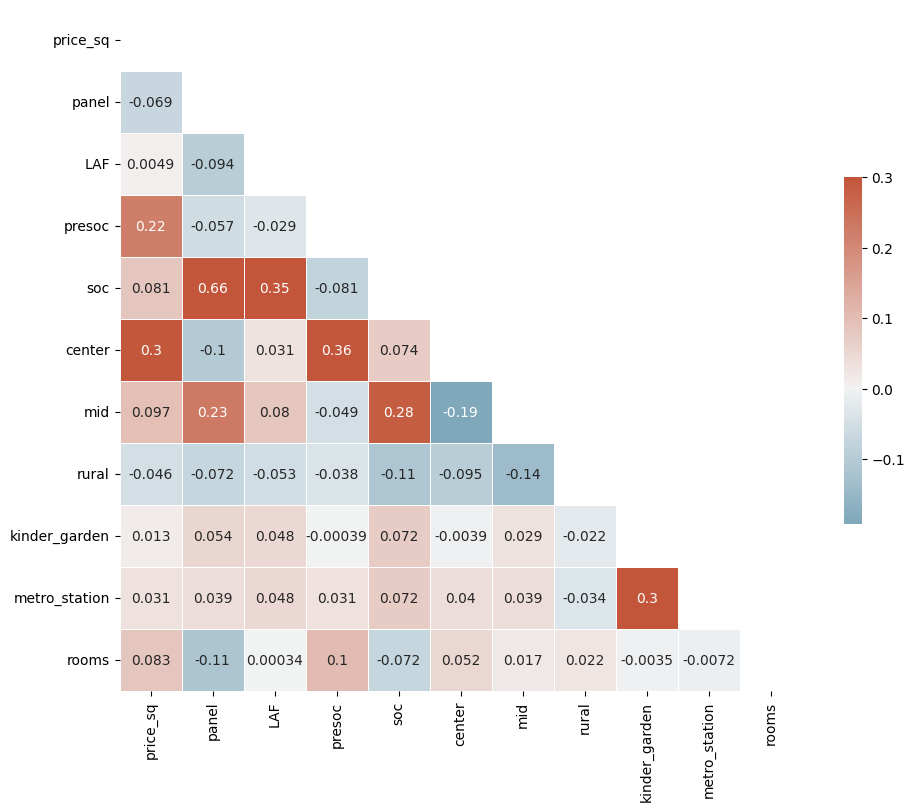

In [36]:
# Calculate the correlation matrix
corr_matrix = df4.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5,annot = True, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

In [34]:
corr_matrix = df4.corr()